<a href="https://colab.research.google.com/github/Ymy9he/group23/blob/main/finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.utils import resample
import seaborn as sns


In [137]:
# read in the data
#df_train =pd.read_csv('/content/training_data.csv.crdownload')
#df_test =pd.read_csv('/content/testing_data.csv.crdownload')


#https://stackoverflow.com/questions/55240330/how-to-read-csv-file-from-github-using-pandas



url_test = 'https://raw.githubusercontent.com/DS3001/group23/main/project_2/data/testing_data.csv'
url_train = 'https://raw.githubusercontent.com/DS3001/group23/main/project_2/data/training_data.csv'

df_test = pd.read_csv(url_test, index_col=0)
df_train = pd.read_csv(url_train, index_col=0)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [138]:
df_test.head()
df_train.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,68685,Male,36.0,0,0,Yes,Govt_job,Urban,65.87,32.2,formerly smoked,0
1,59058,Female,45.0,0,0,Yes,Govt_job,Rural,68.66,25.3,never smoked,0
2,46068,Male,58.0,0,0,No,Self-employed,Rural,170.93,30.7,Unknown,0
3,36837,Female,61.0,0,0,Yes,Self-employed,Urban,69.88,27.1,never smoked,0
4,30550,Female,78.0,0,0,No,Private,Urban,103.86,30.6,Unknown,0


In [139]:
unique_columns = df_train.columns.tolist()
print(unique_columns)
unique_columns2 = df_test.columns.tolist()
print(unique_columns2)

['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


<AxesSubplot:>

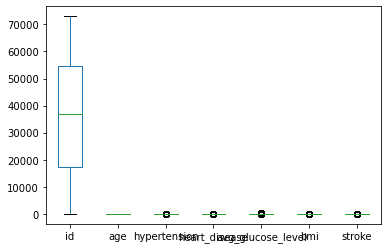

In [140]:
df_train.plot.box()


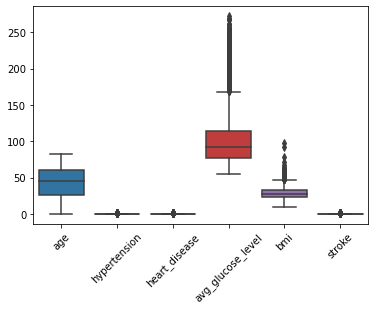

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

df_train = df_train.drop('id', axis=1)

ax = sns.boxplot(data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels

plt.show()  # Show the boxplot
# avg glucose has a lot of outliers, so does bmi 

<AxesSubplot:>

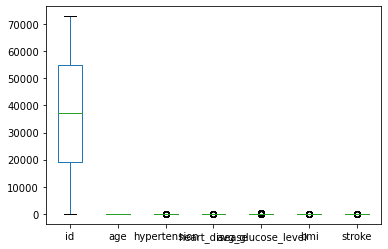

In [142]:
df_test.plot.box()


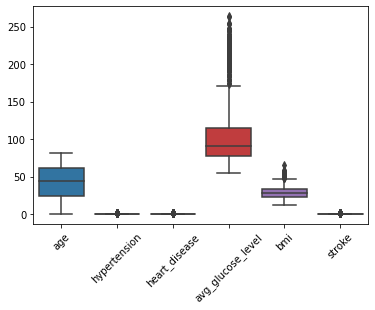

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

df_test = df_test.drop('id', axis=1)

ax = sns.boxplot(data=df_test)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels

plt.show()  # Show the boxplot
# avg glucose has a lot of outliers, so does bmi 

In [144]:
missing_values = df_train.isnull().sum()
print("Missing Values:")
print(missing_values) # 159


Missing Values:
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  159
smoking_status         0
stroke                 0
dtype: int64


In [145]:
missing_values = df_test.isnull().sum()
print("Missing Values:")
print(missing_values) # 42

Missing Values:
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  42
smoking_status        0
stroke                0
dtype: int64


In [146]:
df_train['bmi'].fillna(df_train['bmi'].mean(), inplace=True)
df_test['bmi'].fillna(df_test['bmi'].mean(), inplace=True)

In [147]:
df_train.isnull().sum() # No more NA Values
df_test.isnull().sum() # No more NA Values

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

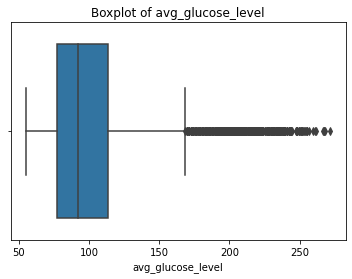

In [148]:
# Create box plots for avg_glucose_level
sns.boxplot(x=df_train['avg_glucose_level'])
plt.title('Boxplot of avg_glucose_level')
plt.show()

In [ ]:
#df_train['avg_glucose_level'] = np.log1p(df_train['avg_glucose_level']) # didnt work

## Function to compute whiskers:
def windsorize(x): # top of model_evaulation notes
    # Compute IQR and 1st,3rd quantiles
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windsorize x:
    x_windsor = x
    x_windsor[ x < lower_whisker ] = lower_whisker
    x_windsor[ x > upper_whisker ] = upper_whisker
    return(x_windsor)

df_train['avg_glucose_level'] = windsorize(df_train['avg_glucose_level'])


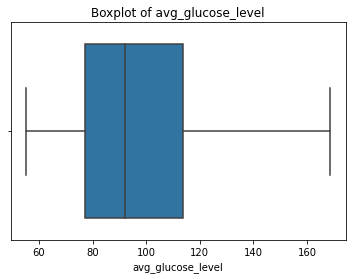

In [150]:
sns.boxplot(x=df_train['avg_glucose_level'])
plt.title('Boxplot of avg_glucose_level')
plt.show()

In [ ]:
df_test['avg_glucose_level'] = windsorize(df_test['avg_glucose_level'])


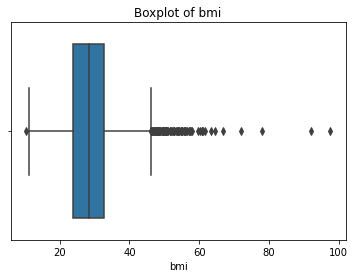

In [157]:
sns.boxplot(x=df_train['bmi'])
plt.title('Boxplot of bmi')
plt.show()

In [ ]:
df_test['bmi'] = windsorize(df_test['bmi'])
df_train['bmi'] = windsorize(df_train['bmi'])


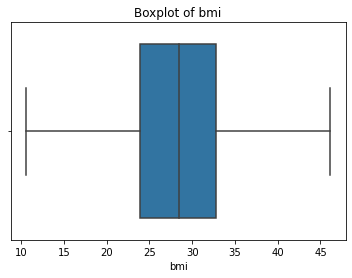

In [164]:
sns.boxplot(x=df_train['bmi'])
plt.title('Boxplot of bmi')
plt.show()

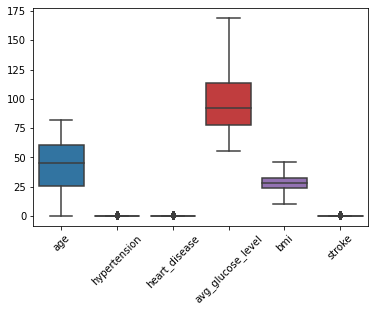

In [166]:

ax = sns.boxplot(data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels

plt.show()  # Show the boxplot
# outliers fone, glucose one whisker is much longer than the other,

In [167]:
y_train = df_train['stroke'] # target variable is stroke
X_train = df_train.drop('stroke',axis=1)
y_test = df_test['stroke']
X_test = df_test.drop('stroke',axis=1)

In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# Separate columns

num_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
cat_cols = ['gender', 'ever_married', 'Residence_type', 'work_type', 'smoking_status']

# Prepare encoded categorical variables for both train and test sets
X_train_encoded = pd.get_dummies(X_train[cat_cols], drop_first=True, dtype='int')
X_test_encoded = pd.get_dummies(X_test[cat_cols], drop_first=True, dtype='int')


# Expand numerical features for the train set
expander = PolynomialFeatures(degree=3, include_bias=False)
Z= expander.fit_transform(X_train[num_cols])
names_train = expander.get_feature_names_out(num_cols)
Z_train = pd.DataFrame(data=Z, columns = names_train) # Create a new, expanded dataframe
X_train_lm = pd.concat([Z_train,X_train_encoded],axis=1)


Z = expander.fit_transform(X_test[num_cols])
names_test = expander.get_feature_names_out(num_cols)
Z_test = pd.DataFrame(data=Z, columns = names_test) # Create a new, expanded dataframe
X_test_lm = pd.concat([Z_test, X_test_encoded],axis=1)


print("Columns in X_train_lm:", X_train_lm.columns)
print("Columns in X_test_lm:", X_test_lm.columns)
#print(X_test_lm.columns)

#missing_values_test = X_test_lm.isnull().sum() went back and cleaned up data nore because there were 2 many missing vals
#print("Missing values in X_test_lm:\n", missing_values_test)


# Fit the model and get the R2 measure
#reg = LinearRegression().fit(X_train_lm, y_train)
#print(reg.score(X_test_lm, y_test))  # R squared measure

#total_values = X_test_lm.shape[0] * X_test_lm.shape[1]
#print("Total values in X_test_lm:", total_values)

Columns in X_train_lm: Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'age^2', 'age hypertension', 'age heart_disease',
       'age avg_glucose_level', 'age bmi', 'hypertension^2',
       'hypertension heart_disease', 'hypertension avg_glucose_level',
       'hypertension bmi', 'heart_disease^2',
       'heart_disease avg_glucose_level', 'heart_disease bmi',
       'avg_glucose_level^2', 'avg_glucose_level bmi', 'bmi^2', 'age^3',
       'age^2 hypertension', 'age^2 heart_disease', 'age^2 avg_glucose_level',
       'age^2 bmi', 'age hypertension^2', 'age hypertension heart_disease',
       'age hypertension avg_glucose_level', 'age hypertension bmi',
       'age heart_disease^2', 'age heart_disease avg_glucose_level',
       'age heart_disease bmi', 'age avg_glucose_level^2',
       'age avg_glucose_level bmi', 'age bmi^2', 'hypertension^3',
       'hypertension^2 heart_disease', 'hypertension^2 avg_glucose_level',
       'hypertension^2 bmi', 'hyperte

In [ ]:
## Linear Model sample code:
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

# Expand features
expander = PolynomialFeatures(degree=3,include_bias=False) # Create the expander
#
Z_train = expander.fit_transform(X_train) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe
#
Z_test = expander.fit_transform(X_test) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model
print(reg.score(X_test_lm, y_test)) # R squared measure

# Predicted values:
y_hat_lm = reg.predict(X_test_lm)
residuals_lm = y_test - y_hat_lm

## Residual plot:
sns.kdeplot(residuals_lm)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_lm,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

## Metrics:
SSE_lm = np.sum( (y_test-y_hat_lm)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
R2_lm = 1 - SSE_lm/TSS

In [27]:
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.model_selection import train_test_split
def pn(x):
    print(x,'\n')


# Separate numeric and categorical columns
num_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
cat_cols = ['gender', 'ever_married', 'Residence_type', 'work_type', 'smoking_status']

# Include 'stroke' column (target variable)
y = df_train['stroke']

ym_encoded = pd.get_dummies(df_train[cat_cols], drop_first=True, dtype='int')


#ym_encoded.head()


# Combine encoded categorical and numeric columns
ym = pd.concat([df_train[num_cols], ym_encoded], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ym, y, test_size=0.2, random_state=42)
X_train.head()

reg = LinearRegression().fit(X_train, y_train)


print("Intercept")
pn(reg.intercept_) # Intercept value
print("Coef")
pn(reg.coef_) # Regression coefficients
print("R squared measure")
pn(reg.score(X_test, y_test))  # R squared measure

Intercept
-0.10389813446459303 

Coef
[ 3.26742613e-03  3.85259189e-02  2.63761338e-02  9.99006221e-05
 -1.19225633e-03  1.55121725e-04 -2.03753118e-02  2.39404502e-02
  7.08275088e-02  4.17517461e-02  1.91860250e-02  8.45272693e-02
 -9.50180265e-03 -1.77715238e-02 -2.28869137e-03] 

R squared measure
0.06544215232602912 



Intercept
-0.10389813446459303 

Coef
[ 3.26742613e-03  3.85259189e-02  2.63761338e-02  9.99006221e-05
 -1.19225633e-03  1.55121725e-04 -2.03753118e-02  2.39404502e-02
  7.08275088e-02  4.17517461e-02  1.91860250e-02  8.45272693e-02
 -9.50180265e-03 -1.77715238e-02 -2.28869137e-03] 

R squared measure
0.06544215232602912 

R squared measure (Polynomial Features): -509315211208.75024


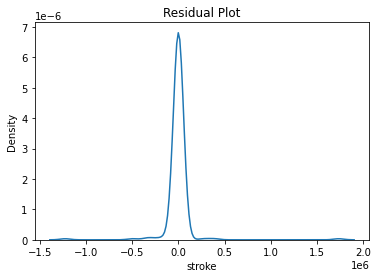

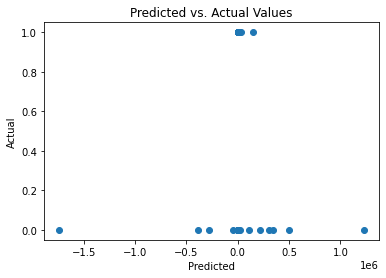

SSE: 5301847125471.254
MSE: 25862668904.737823
RMSE: 160818.7455016915
R squared: -509315211208.75024


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def pn(x):
    print(x,'\n')

# Separate numeric and categorical columns
num_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
cat_cols = ['gender', 'ever_married', 'Residence_type', 'work_type', 'smoking_status']

# Include 'stroke' column (target variable)
y = df_train['stroke']

ym_encoded = pd.get_dummies(df_train[cat_cols], drop_first=True, dtype='int')

# Combine encoded categorical and numeric columns
ym = pd.concat([df_train[num_cols], ym_encoded], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ym, y, test_size=0.2, random_state=42)

# Fit Linear Regression on original features
reg = LinearRegression().fit(X_train, y_train)

print("Intercept")
pn(reg.intercept_)  # Intercept value
print("Coef")
pn(reg.coef_)  # Regression coefficients
print("R squared measure")
pn(reg.score(X_test, y_test))  # R squared measure

# Expand features
expander = PolynomialFeatures(degree=3, include_bias=False)

X_train_lm = expander.fit_transform(X_train)
X_test_lm = expander.transform(X_test)

# Fit the model and get the R2 measure:
reg_poly = LinearRegression().fit(X_train_lm, y_train)
print("R squared measure (Polynomial Features):", reg_poly.score(X_test_lm, y_test))

# Predicted values:
y_hat_lm = reg_poly.predict(X_test_lm)
residuals_lm = y_test - y_hat_lm

## Residual plot:
sns.kdeplot(residuals_lm)
plt.title('Residual Plot')
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_lm, y=y_test)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Metrics:
N_test = len(y_test)
TSS = np.sum((y_test - y_test.mean())**2)
SSE_lm = np.sum((y_test - y_hat_lm)**2)
MSE_lm = SSE_lm / N_test
RMSE_lm = np.sqrt(MSE_lm)
R2_lm = 1 - SSE_lm / TSS

print("SSE:", SSE_lm)
print("MSE:", MSE_lm)
print("RMSE:", RMSE_lm)
print("R squared:", R2_lm)




Intercept: -0.10389813446459303
Coefficients: [ 3.26742613e-03  3.85259189e-02  2.63761338e-02  9.99006221e-05
 -1.19225633e-03  1.55121725e-04 -2.03753118e-02  2.39404502e-02
  7.08275088e-02  4.17517461e-02  1.91860250e-02  8.45272693e-02
 -9.50180265e-03 -1.77715238e-02 -2.28869137e-03]
R squared measure: 0.06544215232602912
R squared measure (Polynomial Features): -0.22249583922769722
MSE (Polynomial Features): 0.06207748056899241
RMSE (Polynomial Features): 0.24915352810865918


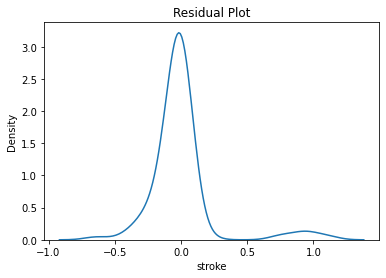

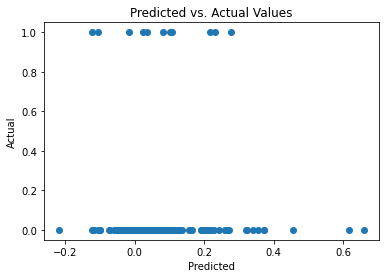

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Separate numeric and categorical columns
num_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
cat_cols = ['gender', 'ever_married', 'Residence_type', 'work_type', 'smoking_status']

# (target variable)
y = df_train['stroke']

# One-hot encode categorical variables
ym_encoded = pd.get_dummies(df_train[cat_cols], drop_first=True, dtype='int')

# Combine encoded categorical and numeric columns
ym = pd.concat([df_train[num_cols], ym_encoded], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ym, y, test_size=0.2, random_state=42)

# Fit Linear Regression on original features
reg = LinearRegression().fit(X_train, y_train)

print("Intercept:", reg.intercept_)  # Intercept value
print("Coefficients:", reg.coef_)  # Regression coefficients
print("R squared measure:", reg.score(X_test, y_test))  # R squared measure

# Expand features with PolynomialFeatures
expander = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = expander.fit_transform(X_train)
X_test_poly = expander.transform(X_test)

# Fit the model and get the R2 measure
reg_poly = LinearRegression().fit(X_train_poly, y_train)
y_hat_poly = reg_poly.predict(X_test_poly)

print("R squared measure (Polynomial Features):", r2_score(y_test, y_hat_poly))

# Metrics
MSE_poly = mean_squared_error(y_test, y_hat_poly)
RMSE_poly = np.sqrt(MSE_poly)

print("MSE (Polynomial Features):", MSE_poly)
print("RMSE (Polynomial Features):", RMSE_poly)

# Residual plot
residuals_poly = y_test - y_hat_poly
sns.kdeplot(residuals_poly)
plt.title('Residual Plot')
plt.show()

# True versus predicted plot
plt.scatter(x=y_hat_poly, y=y_test)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:


## kNN sample code:
from sklearn.neighbors import KNeighborsRegressor

TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)

# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X:
X_train_knn = X_train.apply(maxmin)
X_test_knn = X_test.apply(maxmin)

missing_values = X_test_knn.isnull().sum()

# Display columns with missing values and their respective counts
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])
#X_train_knn.describe()

#missing_values = X_train_knn.isnull().sum()
#print("Missing Values:")
#print(missing_values) 

In [ ]:

imputer = SimpleImputer(strategy='mean')
X_train_knn_imputed = imputer.fit_transform(X_train_knn)
X_test_knn_imputed = imputer.transform(X_test_knn)
# Determine optimal k:
k_bar = 70
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar-1) # For comparison purposes, store the training error
for k in range(k_bar-1):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train_knn,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test_knn) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index][0] # Find the optimal value of k

## SSE plot:
plt.plot(k_grid,SSE)
plt.xlabel("k")
plt.ylabel("SSE")
plt.title('SSE')
plt.show()


In [ ]:
model = KNeighborsClassifier(n_neighbors=9)
fitted_model = model.fit(X_train,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test) # Predict values for test set
pd.crosstab(y_test, y_hat)

In [ ]:
# Expand features
expander = PolynomialFeatures(degree=3,include_bias=False) # Create the expander
#
Z_train = expander.fit_transform(X_train) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe
#
Z_test = expander.fit_transform(X_test) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model
print(reg.score(X_test_lm, y_test)) # R squared measure

# Predicted values:
y_hat_lm = reg.predict(X_test_lm)
residuals_lm = y_test - y_hat_lm

## Residual plot:
sns.kdeplot(residuals_lm)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_lm,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

## Metrics:
SSE_lm = np.sum( (y_test-y_hat_lm)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
R2_lm = 1 - SSE_lm/TSS